In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

In [4]:
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [5]:
features = df[feature_columns].values
target = df['Close'].values

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.reshape(-1, 1))

In [7]:
X = features_scaled[:-1]
y = target_scaled[1:]

In [8]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [ ]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [12]:
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/80
61/61 - 0s - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0014 - val_mse: 0.0014 - 314ms/epoch - 5ms/step
Epoch 2/80
61/61 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 4.7359e-05 - val_mse: 4.7359e-05 - 52ms/epoch - 853us/step
Epoch 3/80
61/61 - 0s - loss: 0.0056 - mse: 0.0056 - val_loss: 1.2604e-04 - val_mse: 1.2604e-04 - 52ms/epoch - 850us/step
Epoch 4/80
61/61 - 0s - loss: 0.0053 - mse: 0.0053 - val_loss: 1.5443e-05 - val_mse: 1.5443e-05 - 54ms/epoch - 887us/step
Epoch 5/80
61/61 - 0s - loss: 0.0048 - mse: 0.0048 - val_loss: 1.0027e-05 - val_mse: 1.0027e-05 - 51ms/epoch - 835us/step
Epoch 6/80
61/61 - 0s - loss: 0.0046 - mse: 0.0046 - val_loss: 1.3110e-05 - val_mse: 1.3110e-05 - 52ms/epoch - 851us/step
Epoch 7/80
61/61 - 0s - loss: 0.0046 - mse: 0.0046 - val_loss: 4.5975e-05 - val_mse: 4.5975e-05 - 50ms/epoch - 823us/step
Epoch 8/80
61/61 - 0s - loss: 0.0044 - mse: 0.0044 - val_loss: 2.2862e-05 - val_mse: 2.2862e-05 - 50ms/epoch - 820us/step
Epoch 9/80
61/61 - 0s - loss: 0.0

In [13]:
y_pred = model.predict(X_test)

y_pred = np.squeeze(y_pred)
y_test = np.squeeze(y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}')

19/19 [==============================] - 0s 513us/step
MSE: 0.0056
MAE: 0.0700
R2: -1.6296


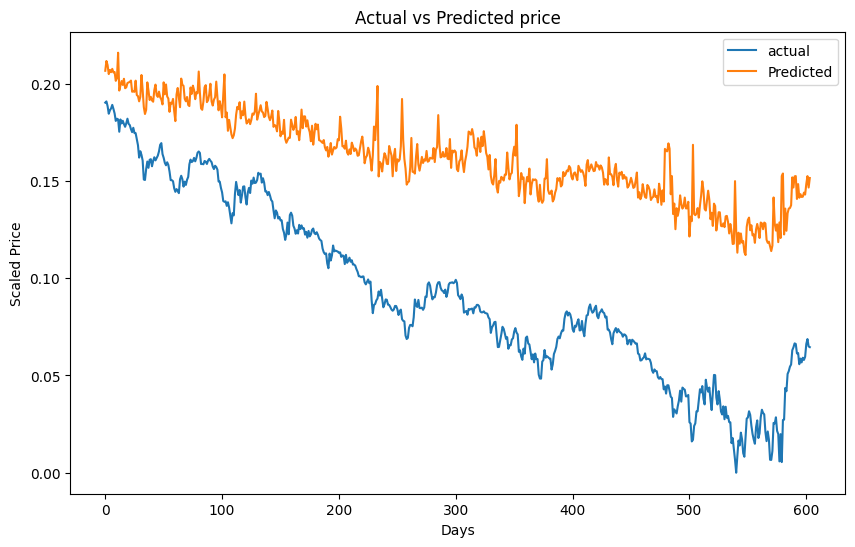

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.title('Actual vs Predicted price')
plt.legend()
plt.show()